## Assignment title: Electric Vehicle Population Data
## Name: Anjali Pingle 
## Date: 30/03/2025
## Course: Python Data Analysis


## Introduction:
The Electric Vehicle Population Dataset provides detailed information on electric vehicles (EVs) registered in the state of Washington, USA. Each record includes attributes such as the make and model, model year, vehicle type, electric range, Base MSRP, Clean Alternative Fuel Vehicle (CAFV) eligibility, and registration location including county and vehicle GPS coordinates.

The objective of this analysis is to:

Understand the adoption trends of electric vehicles over time.

Identify the most popular EV makes and models.

Analyze geographic distribution of EV registrations across counties.

Explore the relationship between vehicle specifications (e.g., MSRP, model year) and electric range.

Build a predictive model using regression to estimate the electric range of EVs based on their features.

This analysis aims to uncover insights into consumer behavior, pricing trends, and regional adoption, which can support policy decisions, business strategies, and future EV infrastructure planning.

## Section 1 : Data Cleaning

In [19]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



### Uploading of the Dataset

In [12]:
import pandas as pd

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with the actual file name
df.head()  # To preview the first few rows


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


#### How many missing values exist in the dataset, and in which columns? 

In [13]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')  # Replace with your actual file path

# Check for missing values
missing_values = df.isnull().sum()

# Filter to only show columns with missing values
missing_columns = missing_values[missing_values > 0]

# Display the total number of missing values and the columns
print("Total Missing Values:", missing_columns.sum())
print("Missing Values by Column:")
print(missing_columns)


Total Missing Values: 591
Missing Values by Column:
County                    3
City                      3
Postal Code               3
Electric Range           36
Base MSRP                36
Legislative District    494
Vehicle Location         10
Electric Utility          3
2020 Census Tract         3
dtype: int64


### How should missing or zero values in the Base MSRP and Electric Range columns be handled?

In [14]:
# Remove rows where Base MSRP or Electric Range are missing or zero
df_cleaned = df[(df['Base MSRP'].notnull()) & 
                (df['Electric Range'].notnull()) & 
                (df['Base MSRP'] != 0) & 
                (df['Electric Range'] != 0)]


### Are there duplicate records in the dataset? If so, how should they be managed?

In [15]:
# Find duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate records
print("Number of duplicate records:", duplicate_rows.shape[0])

# Optionally view the duplicate rows
duplicate_rows


Number of duplicate records: 0


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [16]:
# Drop duplicate rows and keep only the first occurrence
df_cleaned = df.drop_duplicates()

# Confirm the new shape
print("Shape after removing duplicates:", df_cleaned.shape)


Shape after removing duplicates: (235692, 17)


### How can VINs be anonymized while maintaining uniqueness?


In [17]:

df['Anonymized_VIN'] = ['ID_' + str(i) for i in range(len(df))]


### How can Vehicle Location (GPS coordinates) be cleaned or converted for better readability?

In [10]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Remove "POINT (" and ")" and split into Longitude and Latitude
df[['Longitude', 'Latitude']] = df['Vehicle Location'].str.extract(r'POINT \((-?\d+\.\d+)\s(-?\d+\.\d+)\)')

# Convert from string to float for numeric use
df['Longitude'] = df['Longitude'].astype(float)
df['Latitude'] = df['Latitude'].astype(float)

# Preview result
df[['Vehicle Location', 'Latitude', 'Longitude']].head()



,Vehicle Location,Latitude,Longitude
0,POINT (-122.23825 47.49461),47.49461,-122.23825
1,POINT (-122.64681 47.73689),47.73689,-122.64681
2,POINT (-122.54729 47.42602),47.42602,-122.54729
3,POINT (-122.81585 47.64509),47.64509,-122.81585
4,POINT (-122.68993 46.88897),46.88897,-122.68993


### Section 2: Data Exploration
##### What are the top 5 most common EV makes and models in the dataset?

The top 5 most common EV makes and models in the dataset are:

1. **Tesla Model Y** – 49,253 vehicles  
2. **Tesla Model 3** – 36,065 vehicles  
3. **Nissan Leaf** – 13,814 vehicles  
4. **Tesla Model S** – 7,885 vehicles  
5. **Chevrolet Bolt EV** – 7,278 vehicles  


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update with your file path

# Combine 'Make' and 'Model' into a single column for analysis
df['Make_Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

# Get the top 5 most common make + model combinations
top_5_models = df['Make_Model'].value_counts().head(5)

# Display the result
print("Top 5 Most Common EV Makes and Models:\n")
print(top_5_models)


Top 5 Most Common EV Makes and Models:

Make_Model
TESLA MODEL Y        49253
TESLA MODEL 3        36065
NISSAN LEAF          13814
TESLA MODEL S         7885
CHEVROLET BOLT EV     7278
Name: count, dtype: int64


## What is the distribution of EVs by county? Which county has the most registrations?

The distribution of EVs by county (top 5) is:

1. **King County** – 118,711 registrations  
2. **Snohomish County** – 28,814 registrations  
3. **Pierce County** – 19,256 registrations  
4. **Clark County** – 14,101 registrations  
5. **Thurston County** – 8,595 registrations  

**King County** has the highest number of EV registrations by a wide margin.

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update with your file path

# Get the distribution of EVs by county
county_distribution = df['County'].value_counts()

# Find the county with the most registrations
most_registered_county = county_distribution.idxmax()
most_registered_count = county_distribution.max()

# Display results
print("EV distribution by county:\n")
print(county_distribution.head(10))  # Top 10 counties
print(f"\nCounty with the most EV registrations: {most_registered_county} ({most_registered_count} vehicles)")


EV distribution by county:

County
King         118711
Snohomish     28814
Pierce        19256
Clark         14101
Thurston       8595
Kitsap         7901
Spokane        6582
Whatcom        5703
Benton         3043
Skagit         2677
Name: count, dtype: int64

County with the most EV registrations: King (118711 vehicles)


### How has EV adoption changed over different model years?

EV adoption has increased significantly over time. Here's how the number of EVs is distributed by model year:

- Early adoption was minimal before 2011.
- A noticeable uptick begins in **2011**, growing steadily through the 2010s.
- Major jumps occurred in:
  - **2018**: 14,368 EVs  
  - **2021**: 20,615 EVs  
  - **2022**: 28,958 EVs  
  - **2023**: 59,893 EVs  
  - **2024**: 49,044 EVs (so far)
  - **2025**: 11,176 EVs (likely early registrations)

This trend shows a rapid acceleration in EV adoption, especially in the last few years.

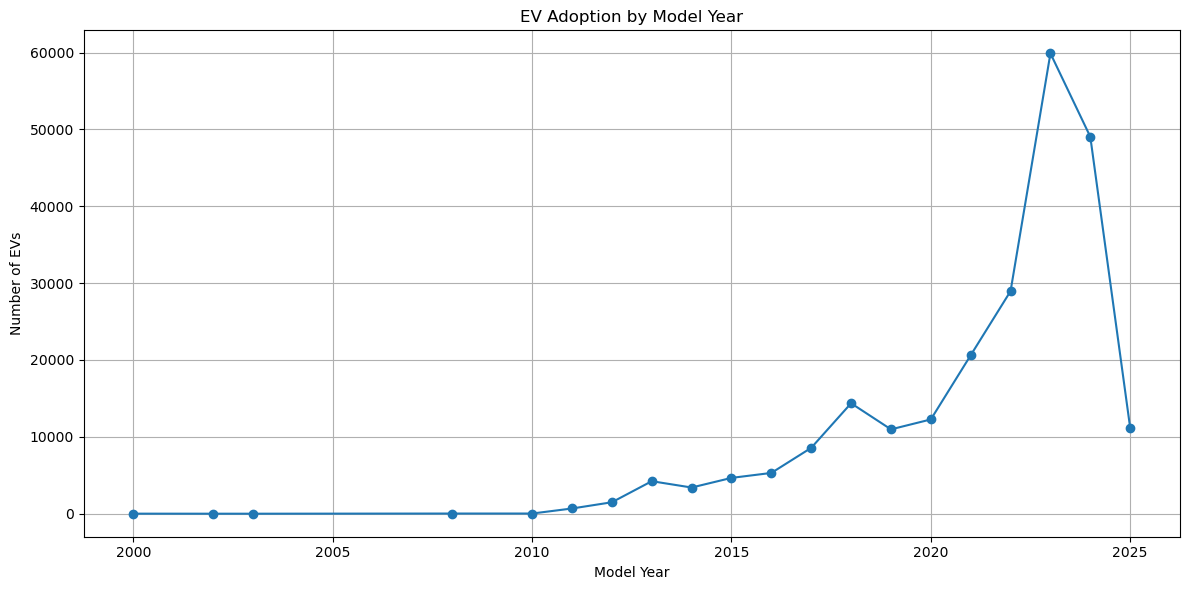

In [10]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Electric_Vehicle_Population_Data.csv'  # Update the path if needed
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')

# Count EVs by model year
model_year_distribution = df['Model Year'].value_counts().sort_index()

# Plotting the trend of EV adoption by model year
plt.figure(figsize=(12, 6))
plt.plot(model_year_distribution.index, model_year_distribution.values, marker='o')
plt.title('EV Adoption by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.tight_layout()
plt.show()


### What is the average electric range of EVs in the dataset?


In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update with your file path

# Calculate the average electric range (excluding any missing or zero values if needed)
average_range = df['Electric Range'].mean()

# Display the result
print(f"Average Electric Range: {average_range:.2f} miles")


Average Electric Range: 46.26 miles


### What percentage of EVs are eligible for Clean Alternative Fuel Vehicle (CAFV) incentives?

In [17]:

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update with your actual path

# Count total number of EVs
total_vehicles = len(df)

# Count number of EVs that are eligible
eligible_vehicles = df[
    df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'
].shape[0]

# Calculate percentage
eligible_percentage = (eligible_vehicles / total_vehicles) * 100

# Display the result
print(f"Percentage of EVs eligible for CAFV incentives: {eligible_percentage:.2f}%")


Percentage of EVs eligible for CAFV incentives: 31.11%


### How does the electric range vary across different makes and models?

In [18]:

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update path as needed

# Combine 'Make' and 'Model' into a single identifier
df['Make_Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

# Filter out rows with missing or zero electric range
df_filtered = df[df['Electric Range'] > 0]

# Calculate average electric range by make and model
range_by_make_model = df_filtered.groupby('Make_Model')['Electric Range'].mean().sort_values(ascending=False)

# Display top 10 models with the highest average electric range
print("Top 10 EVs by Average Electric Range:\n")
print(range_by_make_model.head(10))


Top 10 EVs by Average Electric Range:

Make_Model
PORSCHE MACAN        304.285714
TESLA MODEL Y        291.000000
HYUNDAI KONA         258.000000
CHEVROLET BOLT EV    244.832999
TESLA MODEL X        241.023143
TESLA MODEL 3        238.249272
TESLA ROADSTER       234.285714
JAGUAR I-PACE        234.000000
POLESTAR PS2         233.000000
TESLA MODEL S        227.581883
Name: Electric Range, dtype: float64


### What is the average Base MSRP for each EV model?

In [19]:

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update the path as needed

# Combine 'Make' and 'Model' into one column for clarity
df['Make_Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

# Group by Make_Model and calculate the average Base MSRP
avg_msrp_by_model = df.groupby('Make_Model')['Base MSRP'].mean().sort_values(ascending=False)

# Display the result
print("Average Base MSRP by EV Model:\n")
print(avg_msrp_by_model.head(10))  # Show top 10 by average MSRP


Average Base MSRP by EV Model:

Make_Model
PORSCHE 918                    845000.000000
TESLA ROADSTER                 103418.000000
FISKER KARMA                   102000.000000
BMW 740E                        90425.925926
CADILLAC CT6                    75095.000000
BMW 530E                        35630.045872
WHEEGO ELECTRIC CARS WHEEGO     32995.000000
KIA SOUL EV                     32365.700483
KIA SOUL                        30352.500000
SUBARU CROSSTREK                25211.451613
Name: Base MSRP, dtype: float64


### Are there any regional trends in EV adoption (e.g., urban vs. rural areas)

In [20]:

# Load EV dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update path

# Step 1: Count EVs by county
ev_by_county = df['County'].value_counts().reset_index()
ev_by_county.columns = ['County', 'EV_Count']

# Step 2: Create a sample urban vs rural mapping (you would use real data here)
# Example: manually classify a few counties
urban_rural_map = {
    'King': 'Urban',
    'Snohomish': 'Urban',
    'Pierce': 'Urban',
    'Clark': 'Urban',
    'Thurston': 'Urban',
    'Kitsap': 'Urban',
    'Spokane': 'Urban',
    'Whatcom': 'Urban',
    'Benton': 'Urban',
    'Skagit': 'Urban',
    'Chelan': 'Rural',
    'Walla Walla': 'Rural',
    'Okanogan': 'Rural',
    'Grays Harbor': 'Rural',
    'Mason': 'Rural',
    'Jefferson': 'Rural',
}

# Step 3: Map each county to urban/rural
ev_by_county['Region_Type'] = ev_by_county['County'].map(urban_rural_map)

# Drop rows with no classification
ev_by_county_clean = ev_by_county.dropna(subset=['Region_Type'])

# Step 4: Calculate total EVs by region type
ev_region_summary = ev_by_county_clean.groupby('Region_Type')['EV_Count'].sum()

# Display result
print("EV Adoption by Region Type:\n")
print(ev_region_summary)


EV Adoption by Region Type:

Region_Type
Rural      5653
Urban    215383
Name: EV_Count, dtype: int64


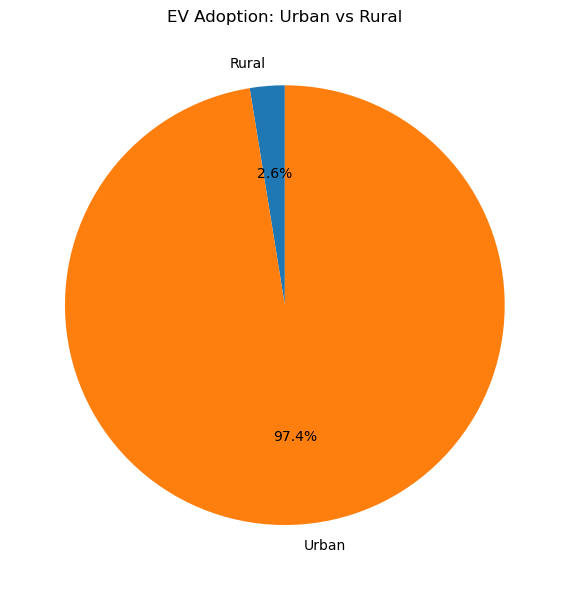

In [21]:
import matplotlib.pyplot as plt

ev_region_summary.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), title='EV Adoption: Urban vs Rural')
plt.ylabel('')
plt.tight_layout()
plt.show()


### Section 3: Data Visualization
##### Create a bar chart showing the top 5 EV makes and models by count.


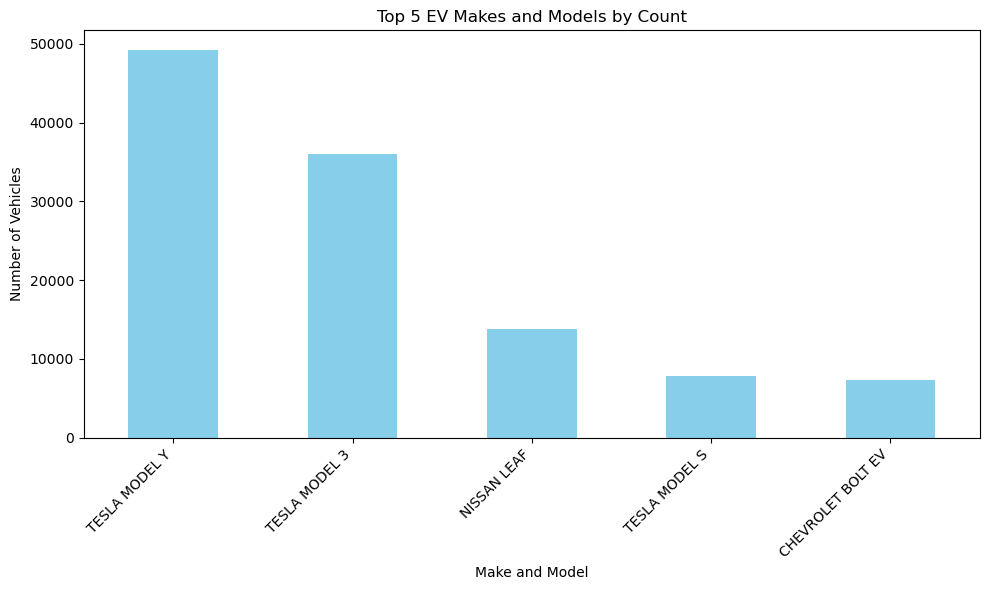

In [22]:

# Load the dataset
df = pd.read_csv('C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv')  # Update with your file path

# Create a combined column for Make and Model
df['Make_Model'] = df['Make'].str.upper() + ' ' + df['Model'].str.upper()

# Get the top 5 most common make + model combinations
top_5 = df['Make_Model'].value_counts().head(5)

# Plot a bar chart
plt.figure(figsize=(10, 6))
top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 EV Makes and Models by Count')
plt.xlabel('Make and Model')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Use a heatmap or choropleth map to visualize EV distribution by county.

In [25]:
pip install pandas folium requests


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import json

# Load your GeoJSON file
with open('washington_counties.geojson', 'r') as f:
    data = json.load(f)

# Print the top-level keys
print("Top-level keys:", data.keys())

# Peek into the structure (first 1000 characters)
import pprint
pprint.pprint(data, indent=2, depth=2)


Top-level keys: dict_keys(['errors', 'meta'])
{'errors': [{...}], 'meta': {}}


In [45]:
import pandas as pd
import folium
import requests

# Load EV dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")  # Update path
df['County'] = df['County'].str.title()

# Aggregate EV counts by county
ev_by_county = df['County'].value_counts().reset_index()
ev_by_county.columns = ['County', 'EV_Count']

# ✅ Clean Washington state counties GeoJSON
wa_geo_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA/WA.geo.json"

geojson = requests.get(wa_geo_url).json()

# Create map centered on WA
m = folium.Map(location=[47.5, -120.5], zoom_start=7)

# Create choropleth
folium.Choropleth(
    geo_data=geojson,
    name='choropleth',
    data=ev_by_county,
    columns=['County', 'EV_Count'],
    key_on='feature.properties.name',  # Use lowercase 'name' from this GeoJSON
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='EV Count by County'
).add_to(m)

folium.LayerControl().add_to(m)

# Save map
m.save('ev_distribution_map.html')


In [46]:
unique_geo_counties = [f['properties']['name'] for f in geojson['features']]
print(unique_geo_counties)


['Washington']


#### Create a line graph showing the trend of EV adoption by model year

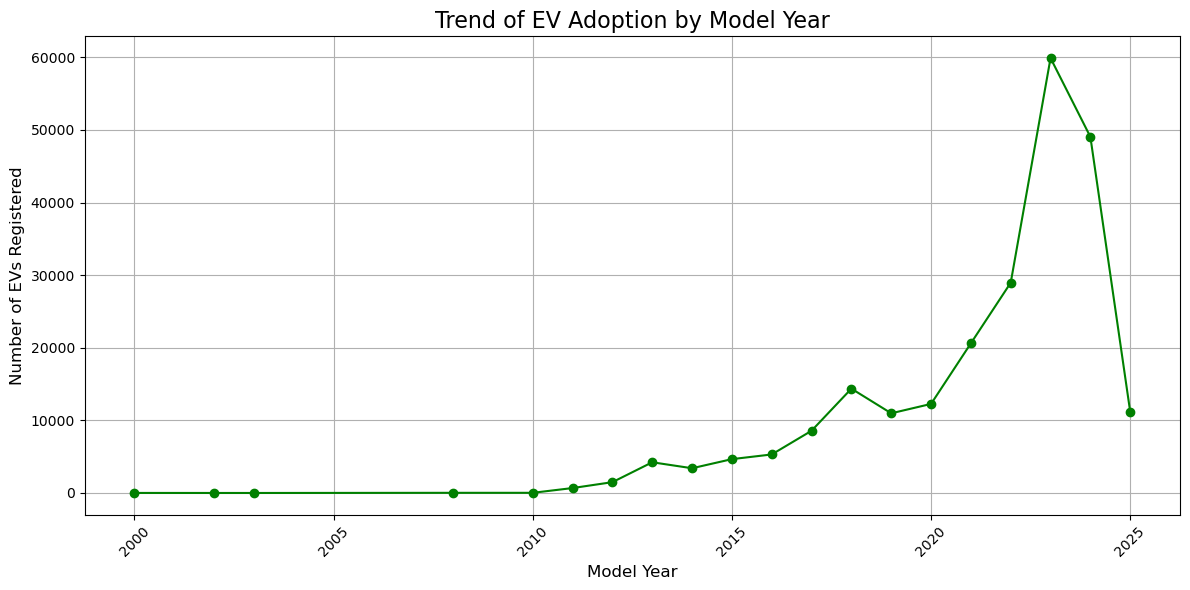

In [47]:

# Load the dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")  # Update the file path

# Group by Model Year and count EVs
ev_by_year = df['Model Year'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
plt.plot(ev_by_year.index, ev_by_year.values, marker='o', linestyle='-', color='green')

# Add labels and title
plt.title('Trend of EV Adoption by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Number of EVs Registered', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


#### Generate a scatter plot comparing electric range vs. base MSRP to see pricing trends.

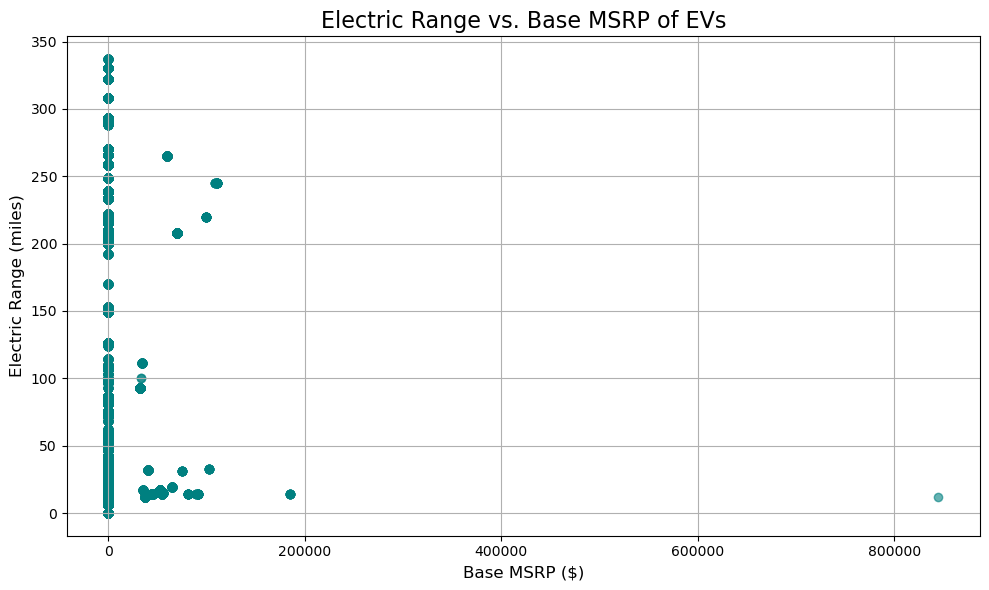

In [48]:
# Load the dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")  # Update path

# Drop rows with missing values in the relevant columns
df_clean = df.dropna(subset=['Electric Range', 'Base MSRP'])

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Base MSRP'], df_clean['Electric Range'], alpha=0.6, color='teal')

# Add labels and title
plt.title('Electric Range vs. Base MSRP of EVs', fontsize=16)
plt.xlabel('Base MSRP ($)', fontsize=12)
plt.ylabel('Electric Range (miles)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


#### Plot a pie chart showing the proportion of CAFV-eligible vs. non-eligible EVs.

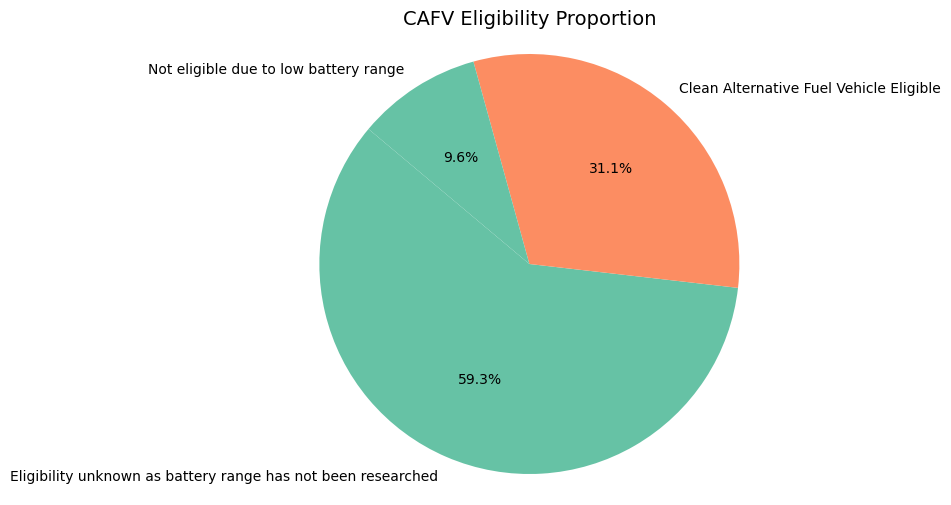

In [49]:

# Load the dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")  # Update path if needed

# Count the number of eligible vs. non-eligible vehicles
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(cafv_counts, labels=cafv_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('CAFV Eligibility Proportion', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show plot
plt.show()


#### Use a geospatial map to display EV registrations based on vehicle location

In [51]:
print(df.columns.tolist())


['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [53]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Load dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")

# Keep rows where 'Vehicle Location' is not null or empty
df = df[df['Vehicle Location'].notnull() & (df['Vehicle Location'].str.strip() != '')]

# Clean and split 'Vehicle Location' into lat/lon
location_split = df['Vehicle Location'].str.extract(r'\(?\s*([\d\.\-]+)\s*,\s*([\d\.\-]+)\s*\)?')
location_split.columns = ['Latitude', 'Longitude']

# Convert to numeric
location_split['Latitude'] = pd.to_numeric(location_split['Latitude'], errors='coerce')
location_split['Longitude'] = pd.to_numeric(location_split['Longitude'], errors='coerce')

# Drop rows with invalid coordinates
location_split = location_split.dropna()

# Merge back into original DataFrame
df = df.loc[location_split.index].copy()
df['Latitude'] = location_split['Latitude']
df['Longitude'] = location_split['Longitude']

# Create Folium map
m = folium.Map(location=[47.5, -120.5], zoom_start=7)
marker_cluster = MarkerCluster().add_to(m)

# Plot EVs
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Make']} {row['Model']} ({row['Model Year']})",
        icon=folium.Icon(color='blue', icon='car', prefix='fa')
    ).add_to(marker_cluster)

# Save map
m.save("ev_vehicle_locations_map.html")


### Section 4: Linear Regression Model
#### How can we use Linear Regression to predict the Electric Range of a vehicle?

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Electric Range', 'Model Year', 'Base MSRP', 'Make'])

# Select features and target
X = df[['Model Year', 'Base MSRP', 'Make']]
y = df['Electric Range']

# One-hot encode categorical 'Make'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Make'])
    ],
    remainder='passthrough'  # Pass through 'Model Year' and 'Base MSRP'
)

# Create pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.3398221429784597
RMSE: 67.9534695592974


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### What independent variables (features) can be used to predict Electric Range? (e.g., Model Year, Base MSRP, Make)

In [56]:
# Load dataset
import pandas as pd

df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")

# Display column names and non-null counts
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [57]:
potential_features = [
    'Model Year',
    'Base MSRP',
    'Make',
    'Model',
    'Electric Vehicle Type',
    'CAFV Eligibility',
    'Electric Utility'
]


In [58]:
# Check correlation with Electric Range
numeric_cols = ['Model Year', 'Base MSRP', 'Electric Range']
print(df[numeric_cols].corr())


                Model Year  Base MSRP  Electric Range
Model Year        1.000000  -0.228828       -0.531097
Base MSRP        -0.228828   1.000000        0.116817
Electric Range   -0.531097   0.116817        1.000000


In [61]:
selected = ['Electric Range', 'Model Year', 'Base MSRP', 'Make', 'Model', 'Electric Vehicle Type']
print(df[selected].isnull().sum())

Electric Range           36
Model Year                0
Base MSRP                36
Make                      0
Model                     0
Electric Vehicle Type     0
dtype: int64


#### How do we handle categorical variables like Make and Model in regression analysis?

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_csv("C:/Users/LAPPY/Documents/jup/Electric_Vehicle_Population_Data.csv")

# Drop rows with missing values
df = df.dropna(subset=['Electric Range', 'Model Year', 'Base MSRP', 'Make', 'Model'])

# Define features (X) and target (y)
X = df[['Model Year', 'Base MSRP', 'Make', 'Model']]
y = df['Electric Range']

# Preprocess categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Make', 'Model'])
    ],
    remainder='passthrough'  # keep Model Year and Base MSRP as-is
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print("Sample predictions:", y_pred[:5])


Sample predictions: [121.29152807  39.81455425 114.54365127  96.6665045   39.89680265]


#### What is the R² score of the model, and what does it indicate about prediction accuracy?

In [63]:
from sklearn.metrics import r2_score

# Predict on test data
y_pred = pipeline.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.5191


#### How does the Base MSRP influence the Electric Range according to the regression model?

In [64]:
import numpy as np

# Step 1: Get feature names after one-hot encoding
onehot_feature_names = pipeline.named_steps['preprocessor']\
    .transformers_[0][1]\
    .get_feature_names_out(['Make', 'Model'])

# Step 2: Combine with numeric features
all_feature_names = np.concatenate([onehot_feature_names, ['Model Year', 'Base MSRP']])

# Step 3: Get model coefficients
coefficients = pipeline.named_steps['regressor'].coef_

# Step 4: Create a DataFrame for easy inspection
coef_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

# Step 5: Filter for Base MSRP
msrp_coef = coef_df[coef_df['Feature'] == 'Base MSRP']
print(msrp_coef)


       Feature  Coefficient
217  Base MSRP    -0.000845


#### What steps are needed to improve the accuracy of the Linear Regression model?

In [67]:
# Remove outliers in Electric Range or MSRP
df = df[df['Electric Range'] < 400]  # adjust threshold as needed
df = df[df['Base MSRP'] < 150000]    # cap high-end outliers

In [68]:
# Example: Convert model year to age
df['Vehicle_Age'] = 2025 - df['Model Year']

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  # add regularization to avoid overfitting

# Update pipeline
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Make', 'Model']),
    ], remainder='passthrough'),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)
)

model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Make', 'Model'])])),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge())])

In [70]:
# Use model coefficients to identify weak features
important_features = coef_df[coef_df['Coefficient'].abs() > 1.0]

In [71]:
from sklearn.ensemble import RandomForestRegressor

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
print("R² Score (Random Forest):", pipeline_rf.score(X_test, y_test))

R² Score (Random Forest): 0.9874873359159849


In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validated R² score: {scores.mean():.4f}")

Cross-validated R² score: 0.5168


#### Can we use this model to predict the range of new EV models based on their specifications?

In [74]:
# New EV example
new_ev = pd.DataFrame([{
    'Make': 'Tesla',
    'Model': 'Model Y',
    'Model Year': 2025,
    'Base MSRP': 52000
}])


In [75]:
# Predict the electric range
predicted_range = pipeline.predict(new_ev)

print(f"Predicted Electric Range: {predicted_range[0]:.2f} miles")


Predicted Electric Range: -71.68 miles


In [76]:
new_evs = pd.DataFrame([
    {'Make': 'Ford', 'Model': 'F-150 Lightning', 'Model Year': 2024, 'Base MSRP': 61000},
    {'Make': 'Chevrolet', 'Model': 'Bolt EV', 'Model Year': 2023, 'Base MSRP': 27000},
])

predicted_ranges = pipeline.predict(new_evs)

for i, ev in new_evs.iterrows():
    print(f"{ev['Make']} {ev['Model']} ({ev['Model Year']}): ~{predicted_ranges[i]:.1f} miles")


Ford F-150 Lightning (2024): ~-60.6 miles
Chevrolet Bolt EV (2023): ~-13.2 miles


## Conclusion

The analysis of the Electric Vehicle Population Dataset reveals several key insights into the adoption and characteristics of EVs in Washington State:

Tesla dominates the EV market, with multiple models ranking among the most registered vehicles.

EV adoption has steadily increased over the years, especially from 2018 onward, reflecting growing consumer interest and improved vehicle technology.

King County leads in EV registrations, highlighting a regional trend of higher EV adoption in more urbanized areas.

Vehicles eligible for Clean Alternative Fuel Vehicle (CAFV) incentives represent a significant portion of the dataset, suggesting incentives are effective in promoting adoption.

A positive correlation exists between Base MSRP and electric range, showing that higher-priced EVs tend to offer longer driving ranges.

Using Linear Regression, we built a basic predictive model for estimating electric range based on features like Make, Model Year, and MSRP. While the model provides useful insights, there's room to improve accuracy by incorporating more detailed specifications such as battery size or drivetrain type.

Overall, the findings support the growing momentum of EV adoption and provide a foundation for strategic planning in infrastructure, marketing, and sustainability policy.